## Super Market Sales Data Exploration

Historical record of sales data in 3 different supermarkets
I have super market sales dataset from :
https://www.kaggle.com/aungpyaeap/supermarket-sales/

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')

%matplotlib inline


In [3]:
# load in the dataset into a pandas dataframe. I am parsing the Date column initially.
sales=pd.read_csv('supermarket_sales.csv',parse_dates=['Date'])

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [4]:
# high-level overview of data shape and composition
print(sales.shape)
print(sales.dtypes)
sales.head(10)
sales.tail(10)

(1000, 17)
Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,2019-03-22,19:06,Credit card,282.80,4.761905,14.1400,4.5
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.3000,804.3000,2019-01-24,18:10,Ewallet,766.00,4.761905,38.3000,6.0
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,2019-03-10,20:46,Ewallet,116.06,4.761905,5.8030,8.8
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2019-02-22,18:35,Ewallet,174.90,4.761905,8.7450,6.6
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,13:28,Cash,618.38,4.761905,30.9190,6.6


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [6]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
sales.columns # column names

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
for i, v in enumerate(sales.columns):
    print(i, v , type(sales[v][1]))

0 Invoice ID <class 'str'>
1 Branch <class 'str'>
2 City <class 'str'>
3 Customer type <class 'str'>
4 Gender <class 'str'>
5 Product line <class 'str'>
6 Unit price <class 'numpy.float64'>
7 Quantity <class 'numpy.int64'>
8 Tax 5% <class 'numpy.float64'>
9 Total <class 'numpy.float64'>
10 Date <class 'pandas._libs.tslibs.timestamps.Timestamp'>
11 Time <class 'str'>
12 Payment <class 'str'>
13 cogs <class 'numpy.float64'>
14 gross margin percentage <class 'numpy.float64'>
15 gross income <class 'numpy.float64'>
16 Rating <class 'numpy.float64'>


In [9]:
sales.nunique() # finding unique values

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [10]:
sum(sales.duplicated())


0

In [11]:
sales.isna().sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# What is the structure of your dataset?


This data set contains 1000 orders with 17 variables.
The dataset is quite clean and there is no problem of duplicate values or null values.
Adding columns or doing some data wrangling will be done as required.


## What is/are the main feature(s) of interest in your dataset?¶


I'm most interested in figuring out preferences of Gender,City, Product line of the sales of the 3 branches of the superstore.


## What features in the dataset do you think will help support your investigation into your feature(s) of interest?


I expect that quality,unit price will have the strongest effect on total sales: better the quality of the product higher the sales. I have the following questions which I need to investigate for having a userful insights.
I have framed the following questions:
1. Does rating influence the total Sales?
2. Does unit price infulence the total Sales?
3. Does the unit price influence the quantity purchased?
4. Does avalibility of credit influence total sales?
5. What is peak time interval or you can say the rush hour of the supermarket?
6. What is sold more in the evening?
7. Does the total sales on the first ten days more than the others?
8. Does the membership increase sales?
9. Do some branches have more cash sales then credit sales? If cash, then the reason of non availibilty of credit?
10. Do we have male or female shoppers more?
11. What is the preference of Payment of women? Cash or Credit? 
12. What is city wise product preference? Can we judge on this preference the income levels of the customers?
13. Which month is doing the best?
14. Which branch is doing the best?
15. Which city is doing the best?

## Univariate Exploration¶


In [238]:
df=sales.copy() # creating a copy of the original dataset

In [239]:
base_color = sb.color_palette()[0] # first color from the tuple list of colors


In [240]:
# Check for the missing values if present

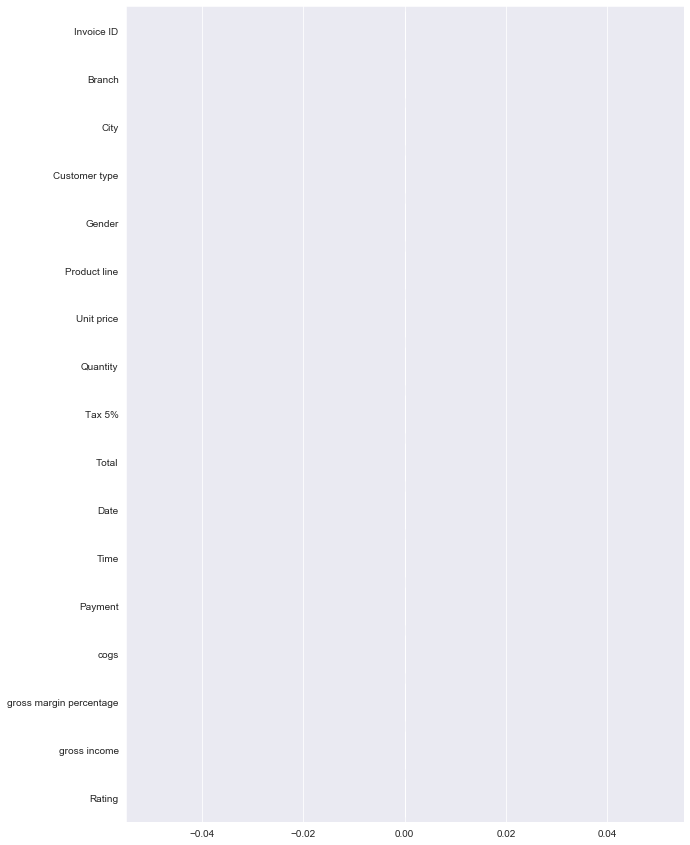

In [241]:
plt.figure(figsize = [10,15])
na_counts = df.isna().sum()
sb.barplot(na_counts, na_counts.index.values, color = base_color);


Observation: 
There are no missing values and no further data wrangling is required for analysis.
We will process for univariate analysis.

# Total Branchwise sales

In [242]:
branchwise_sales=df.groupby('Branch').sum()['Total']
branch=df.groupby('Branch').sum()['Total'].index

In [243]:
branchwise_sales # Branch and its total sales

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

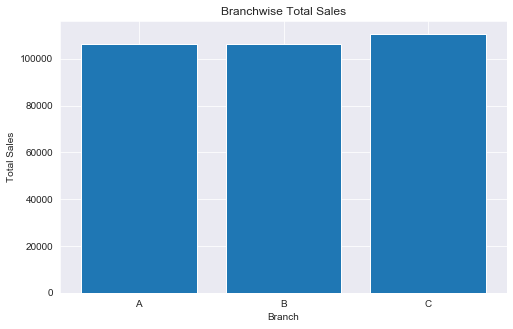

In [334]:
plt.figure(figsize=[8, 5])

plt.bar(branch,branchwise_sales)
plt.xticks(branch)
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.title('Branchwise Total Sales')
plt.show();

Observation: Branch C has the highest total sales

# Genderwise Sales

In [245]:
genderwise_sales=df.groupby('Gender').sum()['Total']
gender=df.groupby('Gender').sum()['Total'].index

In [246]:
genderwise_sales # Total gender purchases

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

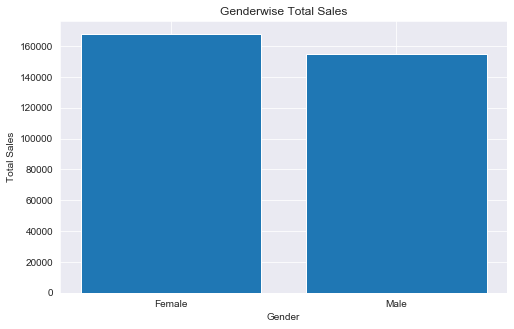

In [335]:
plt.figure(figsize=[8, 5])

plt.bar(gender,genderwise_sales)
plt.xticks(gender)
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.title('Genderwise Total Sales')
plt.show();

Observation: Female shopping is higher than male.

# Membershipwise Sales

In [25]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [26]:
memberwise_sales=sales.groupby('Customer type').sum()['Total']
member=sales.groupby('Customer type').sum()['Total'].index

In [28]:
memberwise_sales # Total member purchases

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

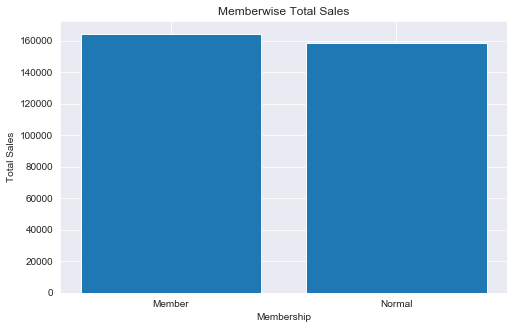

In [336]:
plt.figure(figsize=[8, 5])

plt.bar(member,memberwise_sales)
plt.xlabel('Membership')
plt.ylabel('Total Sales')
plt.title('Memberwise Total Sales')
plt.show();

Observation: Members buy marginally more the non-members

# Citywise Total sales

In [30]:
citywise_sales=df.groupby('City').sum()['Total']
city=df.groupby('City').sum()['Total'].index

In [32]:
citywise_sales # citywise total sales

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

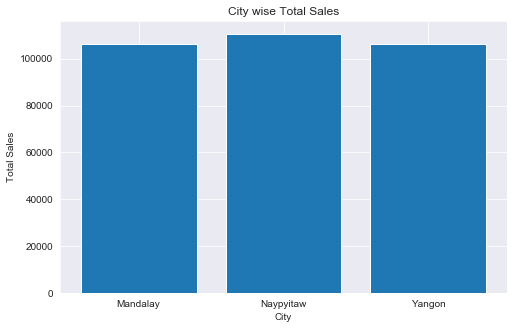

In [337]:
plt.figure(figsize=[8, 5])

plt.bar(city,citywise_sales)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('City wise Total Sales')
plt.show();

Observation: Naypyitaw City has the highest sales 

# Percentage wise distribution of Product line by Total sales

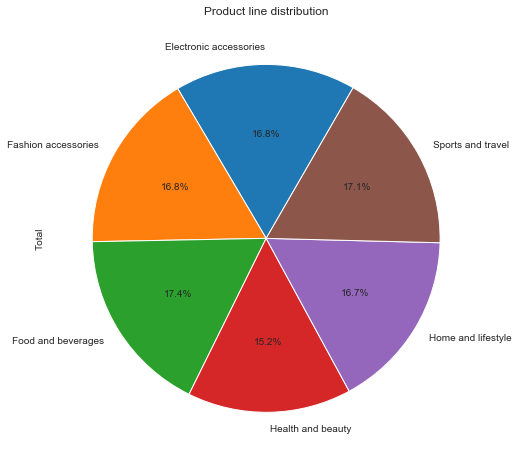

In [346]:
plt.figure(figsize=[8, 8])
explode=(0.1,0.05,0.05)
df.groupby('Product line').sum()['Total'].plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Product line distribution');


Observations: Food and beverages has highest sales percentage while Health and beauty is the lowest.

In [37]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [38]:
df.groupby('Product line').sum()['Total'] 

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

# Payment Method:

In [45]:
payment_tot=df.groupby('Payment').sum()['Total'] # This gives total purchases by different payment method
payment=df.groupby('Payment').sum()['Total'].index

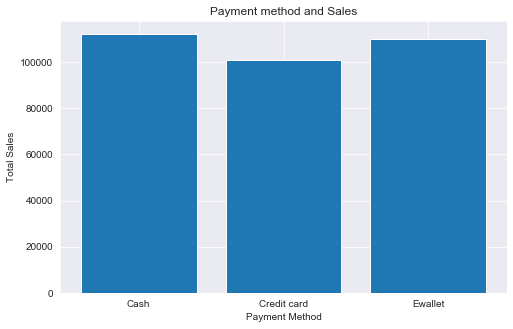

In [347]:
plt.figure(figsize=[8, 5])

plt.bar(payment,payment_tot)
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.title('Payment method and Sales')
plt.show();

Observation: Cash is most preferred method of payment.

# Monthwise sales

In [48]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [50]:
df['Month Of Sale']=df['Date'].dt.month # Finding the month of sale from the Date column

In [51]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month Of Sale
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


In [52]:
monthwise_sales=df['Month Of Sale'].value_counts()
month=df['Month Of Sale'].value_counts().index

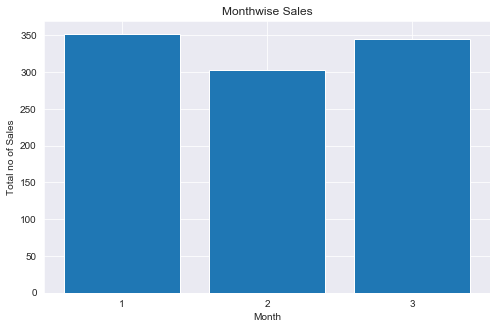

In [348]:
plt.figure(figsize=[8, 5])

plt.bar(month,monthwise_sales)
plt.xticks(month)
plt.xlabel('Month')
plt.ylabel('Total no of Sales')
plt.title('Monthwise Sales')
plt.show();


Observations: January has highest number of orders followed by March and February.
One should remember February has 28 days.So there is a 2 day decrease in no of orders in February.

# Total Sales distribution for number of Orders

''

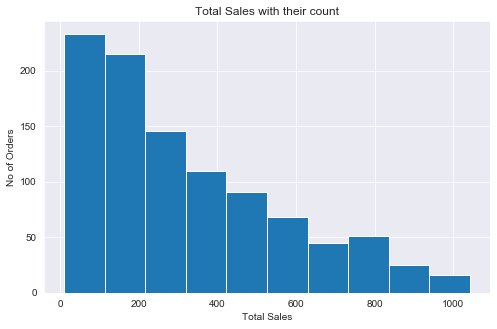

In [349]:
plt.figure(figsize=[8, 5])

plt.hist(df['Total'],bins=10)
plt.xlabel('Total Sales')
plt.ylabel('No of Orders')
plt.title('Total Sales with their count')
;

Observation: Total has a long tailed distribution with a lot of total sales are at low total ends and few on thee high total end. As the Total increases the no of orders decrease

# Unit price distribution for number of Orders

''

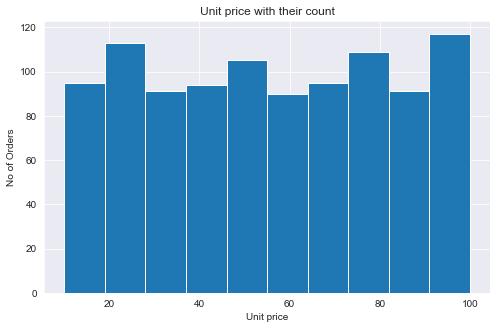

In [350]:
plt.figure(figsize=[8, 5])

plt.hist(df['Unit price'])
plt.xlabel('Unit price')
plt.ylabel('No of Orders')
plt.title('Unit price with their count')
;

Observation: No particular trend found in the unit price and no of orders

# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


The Total sales was right skewed. For a less price range, there were more orders. As the Total amount increased, the number of orders decreased.
The following were my variables of interest:
1. Branch B has highest sales.
2. There are more female shoppers than men.
3. Members do marginally more shopping then non-members.
4. Naypyitow city has highest sales.
5. Food and beverages has highest sales.
6. Cash and ewallet is the most preferred method of payment then credit card.
7. January is the best selling month.

# Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?¶


There was no unusual distributions.I did not perform any operation to tidy the data as it was clean.
I added a month column for the exploring the best selling month.

# Birvariate Analysis

In [59]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month Of Sale
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


# Exploring the relationship between Rating and Total sales

Text(0, 0.5, 'Total')

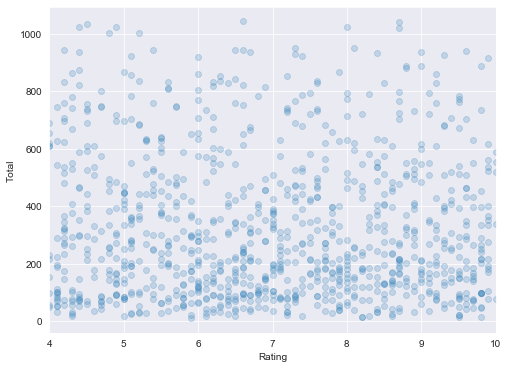

In [254]:
# Question: Does Rating and Total sales have any relationship? Does Rating influence Total Sales?
plt.figure(figsize=[8,6])
plt.xlim([4,10])

plt.scatter(data = df, x = 'Rating', y = 'Total',alpha=1/5);
plt.xlabel('Rating')
plt.ylabel('Total')

Observation: As the ratings increases the Totals do get clustered as well. 

In [60]:
df[['Payment','Total']]

,Payment,Total
0,Ewallet,548.9715
1,Cash,80.2200
2,Credit card,340.5255
3,Ewallet,489.0480
4,Ewallet,634.3785
...,...,...
995,Ewallet,42.3675
996,Ewallet,1022.4900
997,Cash,33.4320
998,Cash,69.1110


In [ ]:
# some coding practice

In [63]:
filt=(df['Total']>=500) & (df['Payment']=='Cash') 
df_cash=df[filt]

In [64]:
df_cash.shape

(78, 18)

In [65]:
filt1=(df['Total']>=500) & (df['Payment']=='Ewallet') 
df_ewallet=df[filt1]
df_ewallet.shape

(75, 18)

In [66]:
filt2=(df['Total']>=500) & (df['Payment']=='Credit card') 
df_cc=df[filt2]

In [67]:
df_cc.shape

(74, 18)

In [76]:
# Box plots

# Product line vs Total and Product line vs Unit price comparision

In [90]:
data_box1=df[['Product line','Unit price']]
data_box2=df[['Product line','Total']]

''

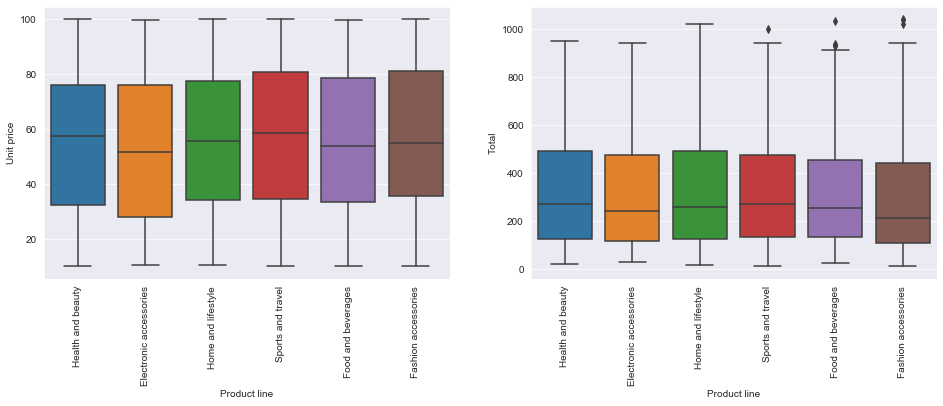

In [102]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
sb.boxplot(data=data_box1,x='Product line',y='Unit price')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sb.boxplot(data=data_box2,x='Product line',y='Total')
plt.xticks(rotation=90)

;


Observation: Electronic accessores have the lowest Q1 quartile. This puts the median total also downwards.
Higher unit prices of Fasion accessories puts the upper,lower quartile and median downwards for the Total.

In [109]:
df_box3=df[['Product line','gross income','Total','City']]

''

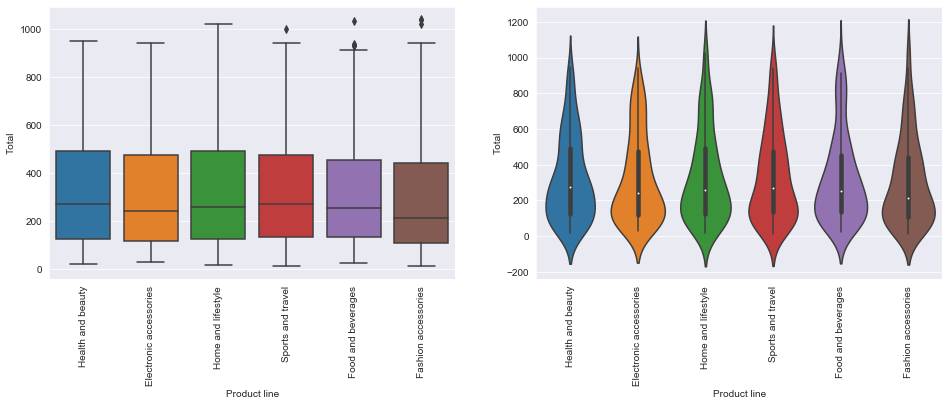

In [112]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
sb.boxplot(data=df_box3,x='Product line',y='Total')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sb.violinplot(data=df_box3,x='Product line',y='Total')
plt.xticks(rotation=90)

;


Observation: The median is least for Food and beverages

In [111]:
df.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month Of Sale
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1


In [113]:
# Clustered bar charts

# Comparing Genderwise purchases of product line

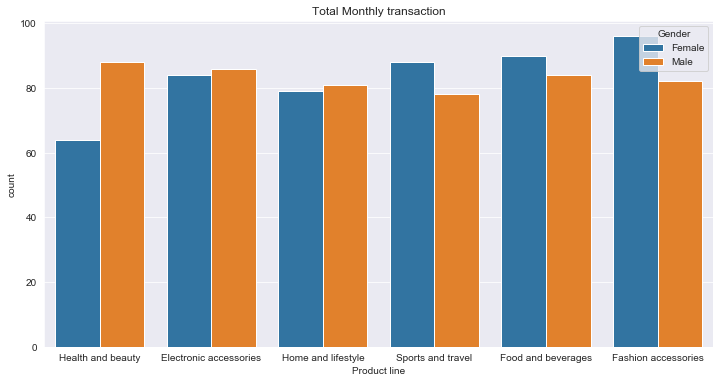

In [257]:
plt.figure(figsize=(12, 6))
plt.title('Total Monthly transaction')
sb.countplot(df['Product line'], hue = df['Gender'])
;

Observation: More orders in Fashion accessories by Female than men. Health and beauty has more male orders.
Sports and travel have Female. Are female spending more on sports than men or they are travelling more than men?
This is the question we need to ask. Do female shoppers are shopping for sports item for their kids?. These questions 
can be posed.

# Payment method comparision for number of purchases in each branch genderwise

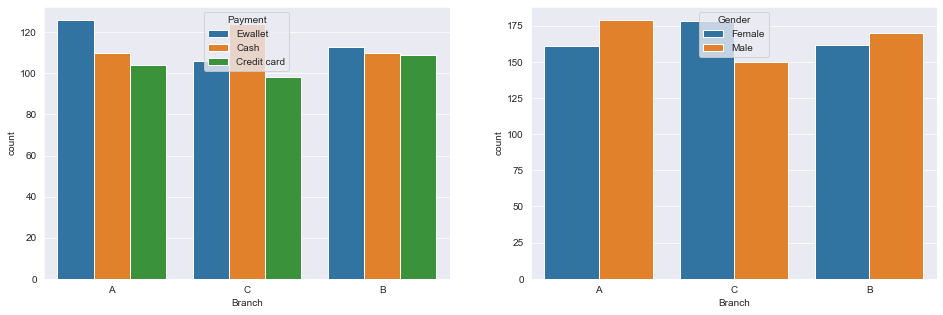

In [258]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
sb.countplot(data=df,x='Branch',hue='Payment')
plt.subplot(1,2,2)
sb.countplot(data=df,x='Branch',hue='Gender');

Observation 1: Ewallet is highest used in Branch A, While Cash is highest used in Branch C.
Question is why Branch C has highest Cash users? also they are the least credit card users. Any reason?
What is the income levels of Branch C customers? Is it industrial area with less education and labor intensive?
Observation 2: More Female shoppers in Branch C then men. Also Branch C has more Cash transactions
then men. So we can conclude in Branch C, there are more female shoppers and their payment preference is Cash.
Question is are the women folks located in Branch C do jobs where they get money in cash daily?

# City and mode of payment

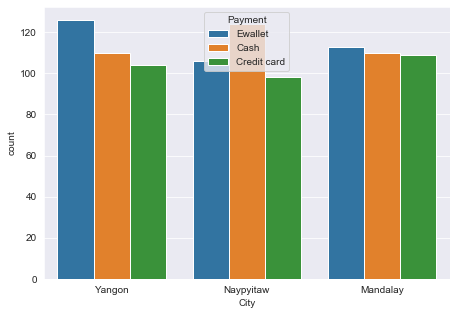

In [259]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
sb.countplot(data=df,x='City',hue='Payment')

Observation: Naypitaw city has higest cash transaction. Ewallet is also quite low.
Does this city located in rural areas where availability of credit is quite low?


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

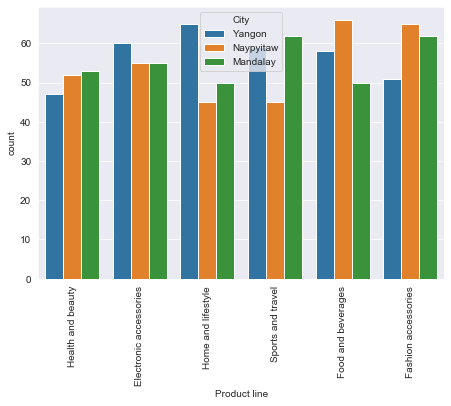

In [260]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
sb.countplot(data=df,x='Product line',hue='City')
plt.xticks(rotation=90)

Observation: The city Naypyilaw has highest cash purchase payment mode as we observed earlier.
Now this has highes purchases in Food and beverages. This city is lowest in sports and travel and home and lifestyle.
It points to a rural economy where Food is the primary daily concern for them.

In [115]:
# use of heat maps

# Branchwise distribution for all the product lines

In [117]:
pl_counts=df.groupby(['Branch','Product line']).size()

In [118]:
pl_counts

Branch  Product line          
A       Electronic accessories    60
        Fashion accessories       51
        Food and beverages        58
        Health and beauty         47
        Home and lifestyle        65
        Sports and travel         59
B       Electronic accessories    55
        Fashion accessories       62
        Food and beverages        50
        Health and beauty         53
        Home and lifestyle        50
        Sports and travel         62
C       Electronic accessories    55
        Fashion accessories       65
        Food and beverages        66
        Health and beauty         52
        Home and lifestyle        45
        Sports and travel         45
dtype: int64

In [119]:
df_heat=pd.DataFrame(pl_counts).reset_index()
df_heat.columns=['Branch', 'Product line','Count']

In [120]:
df_heat

,Branch,Product line,Count
0,A,Electronic accessories,60
1,A,Fashion accessories,51
2,A,Food and beverages,58
3,A,Health and beauty,47
4,A,Home and lifestyle,65
5,A,Sports and travel,59
6,B,Electronic accessories,55
7,B,Fashion accessories,62
8,B,Food and beverages,50
9,B,Health and beauty,53


In [122]:
ct_counts=df_heat.pivot(index='Product line',columns='Branch',values='Count')

In [123]:
ct_counts

Branch,A,B,C
Product line,,,
Electronic accessories,60,55,55
Fashion accessories,51,62,65
Food and beverages,58,50,66
Health and beauty,47,53,52
Home and lifestyle,65,50,45
Sports and travel,59,62,45


''

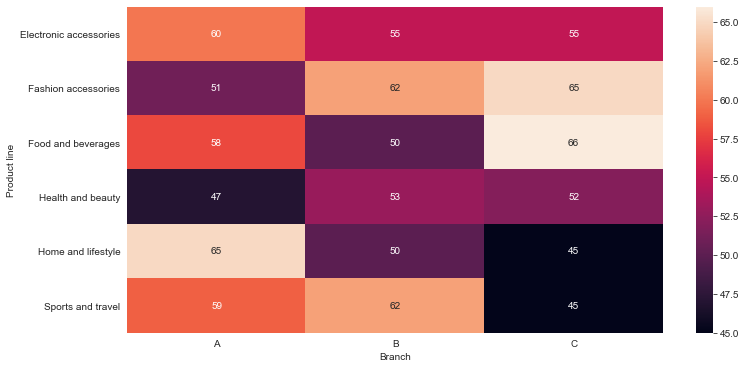

In [126]:
plt.figure(figsize=(12, 6))

sb.heatmap(ct_counts,annot=True)
;

In [129]:
# swarm plots

In [132]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month Of Sale
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3


# Total purchases count Genderwise

(array([0, 1]), <a list of 2 Text xticklabel objects>)

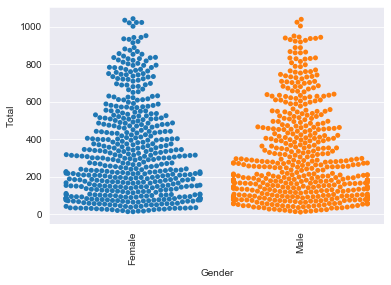

In [135]:
sb.swarmplot(data=df,x='Gender',y='Total')
plt.xticks(rotation=90)

Observation: Total between 400 to 600 has higher datapoints for Female than male. Also you can see from 700 to 900.

# Total purchases count Branch wise

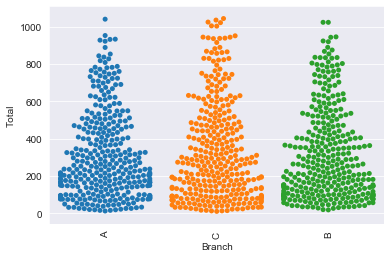

In [137]:
sb.swarmplot(data=df,x='Branch',y='Total')
plt.xticks(rotation=90);

Observation: Branch A has highest total purchses in the range upto 400

# Average sales by product line

Text(0, 0.5, 'Avg. Unit price for each Product line')

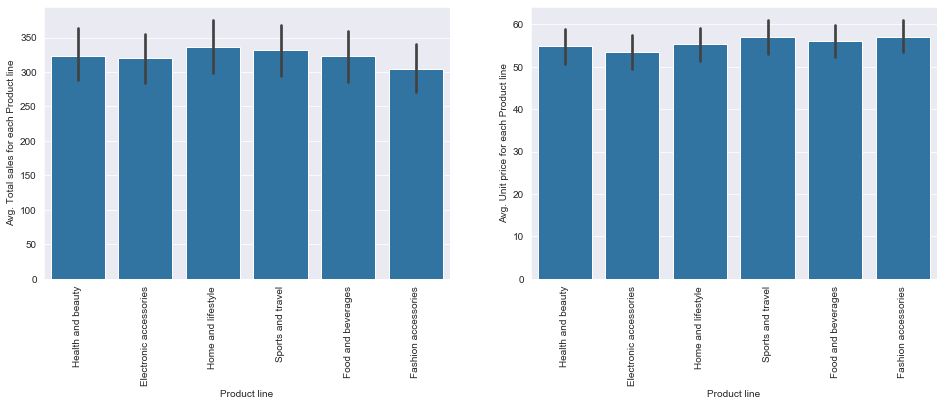

In [146]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
base_color=sb.color_palette()[0]
sb.barplot(data=df,x='Product line',y='Total',color=base_color)
plt.xticks(rotation=90)
plt.ylabel('Avg. Total sales for each Product line')
plt.subplot(1,2,2)
sb.barplot(data=df,x='Product line',y='Unit price',color=base_color)
plt.xticks(rotation=90)
plt.ylabel('Avg. Unit price for each Product line')

Observation: Higher average unit price in Food and bevarages does not lower average Total sales in Food and bevarages.
Same is true for Health and beauty. While higher average unit price in Fashion accessories lower the average total sales

In [148]:
# Timeseries by resampling

# Daily Total Sales Trend

In [149]:
df_time=df[['Date','Total']]

In [150]:
df_time.set_index('Date',inplace=True)

In [151]:
df_time.dtypes

Total    float64
dtype: object

In [152]:
resampled=df_time.resample('W').sum() # This resampling will group the totals weekly

In [232]:
resampled.head()

,Total
Date,
2019-01-06,17543.3895
2019-01-13,24461.1990
2019-01-20,28693.3605
2019-01-27,29286.8835
2019-02-03,28360.4475


In [154]:
resampled.sum() 

Total    322966.749
dtype: float64

In [157]:
df['Total'].sum() # verification of of resampled

322966.74899999995

<Figure size 720x576 with 0 Axes>

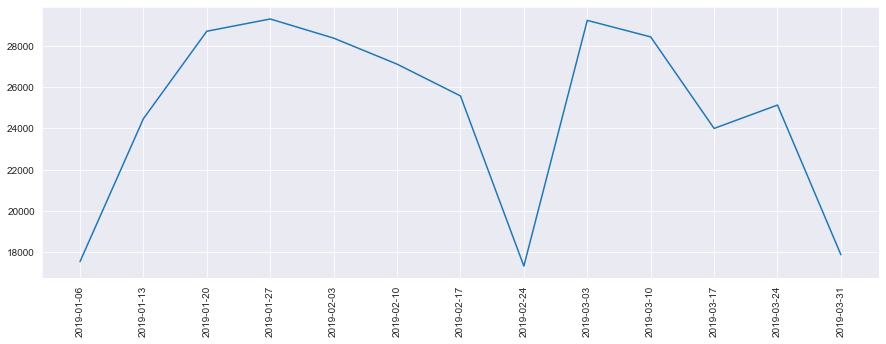

In [158]:
from matplotlib.pyplot import figure
resampled_dates=resampled.index

figure(figsize=(10, 8))
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(resampled)
plt.xticks(resampled_dates,rotation=90);

Observation: March has  some declining sales compared to January and February.


# Explore relationship between rating and Product line

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

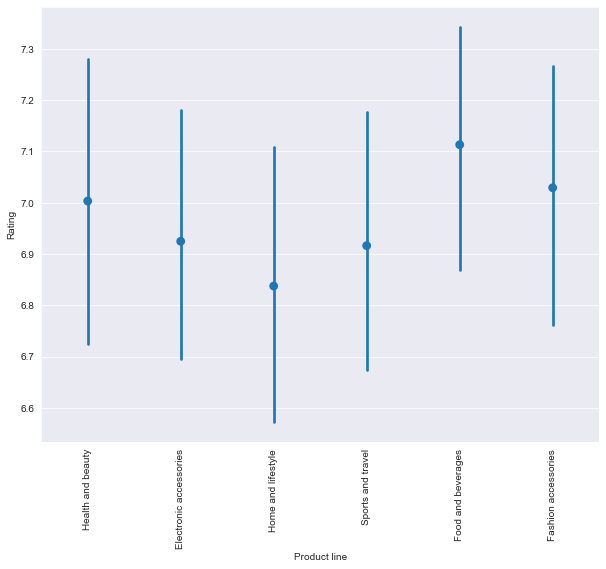

In [167]:

figure(figsize=(10, 8))

sb.pointplot(data=df,x='Product line',y='Rating',color=base_color,linestyles="")
plt.xticks(rotation=90)


Observation: Highest average ratings belong to Food and beverages. Do these supermarket sells high quality of food and beverages?
Home and lifestyle has the lowest average ratings. Low Quality goods may be the reason.



# Buying pattern according to the days of the month


In [279]:
df['day']=pd.to_datetime(df['Date']).dt.day

In [280]:
df_sales=df['day'].value_counts() # Day and its no of purchases
dy=df['day'].value_counts().index

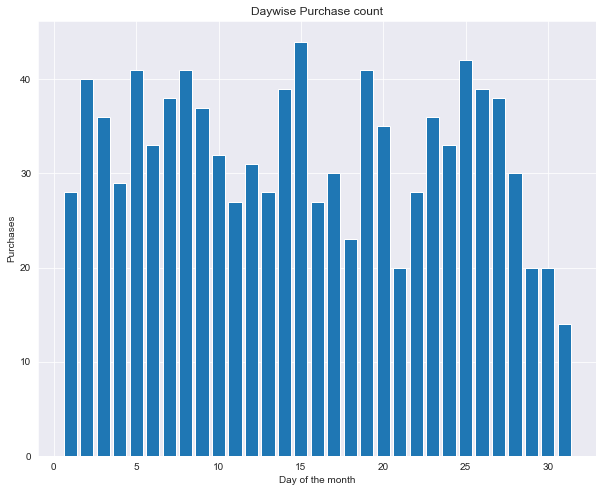

In [281]:
figure(figsize=(10, 8))

plt.bar(dy,df_sales)
plt.xlabel('Day of the month')
plt.ylabel('Purchases')
plt.title('Daywise Purchase count')
plt.show();

Observation: Initial 10 days(Salary days?) sees an upticks followed by some decrease. Before tapering out after 27th day, it shows significant increase.

In [ ]:
# Buying pattern according to the hours of the day


In [284]:
df['hour']=pd.to_datetime(df['Time'],format='%H:%M').dt.hour # extracting hour from the time column. I am approximating hr.

In [286]:
df['hour'].value_counts()

19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: hour, dtype: int64

In [288]:
df_hour=df['hour'].value_counts() # Purchase count according to hour
hr=df['hour'].value_counts().index

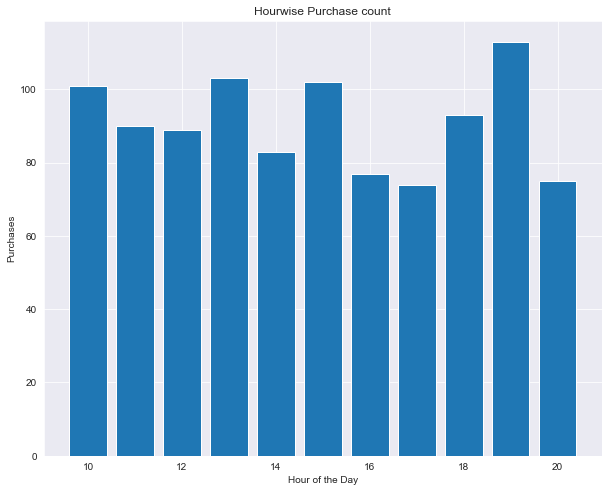

In [291]:
figure(figsize=(10, 8))

plt.bar(hr,df_hour)
plt.xlabel('Hour of the Day')
plt.ylabel('Purchases')
plt.title('Hourwise Purchase count')
plt.show();

Observation: Rush hour seems to be at 7:00 pm after office/work hours. Uptrends do show up at 1:00 pm and 3:00 pm

## When are Food and Beverages purchased most?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

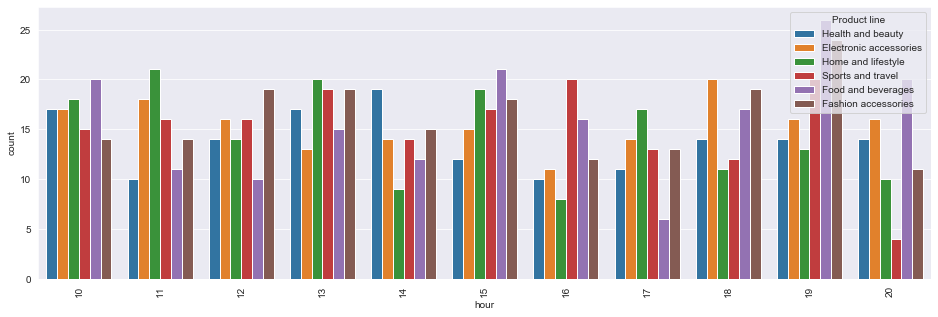

In [292]:
plt.figure(figsize=[16,5])
sb.countplot(data=df,x='hour',hue='Product line')
plt.xticks(rotation=90)

Observation : Food and Beverages is the highest selling after 6:00 Pm

In [174]:
# facet grid

# Exploring quantity purchased product line wise

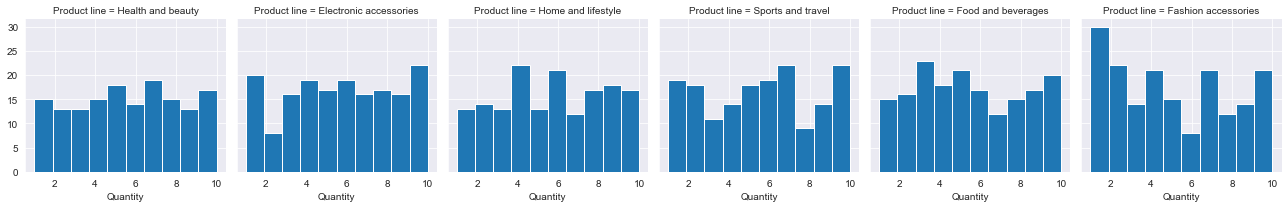

In [175]:
g=sb.FacetGrid(data=df,col='Product line')
g.map(plt.hist,'Quantity');

Observation: Fashion accessories have some highest count for low quantity of goods purchased 

# Exploring the unit price for product line wise


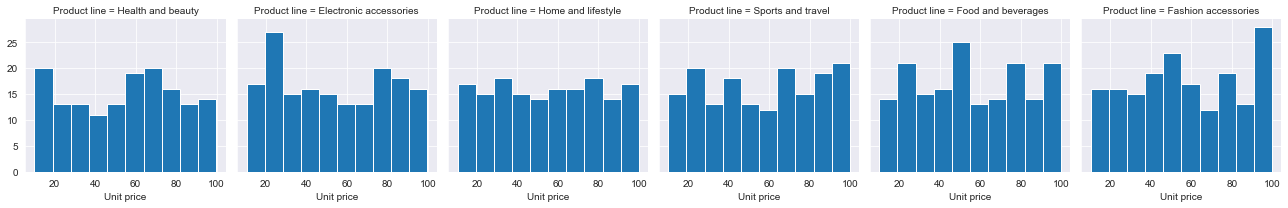

In [176]:
g=sb.FacetGrid(data=df,col='Product line')
g.map(plt.hist,'Unit price');

Observation: Fashion accessories with some high unit price shows some significant purchases.
Electronic accessories with low unit price shows some high purchases.

# Exploring Ratings product line wise


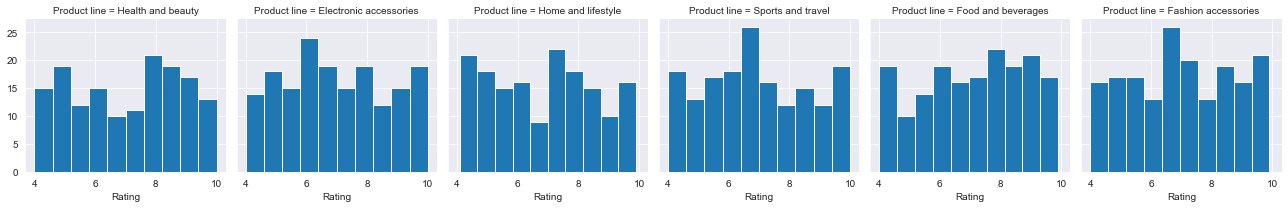

In [177]:
g=sb.FacetGrid(data=df,col='Product line')
g.map(plt.hist,'Rating');

Observation: Food and beverages have some consistent higher ratings.

# Exploring Quantity product line wise


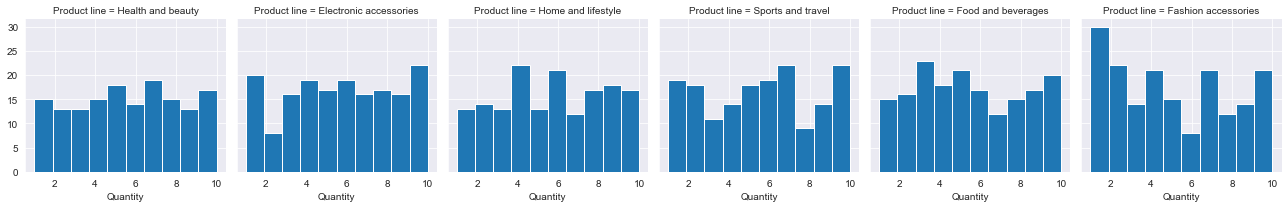

In [178]:
g=sb.FacetGrid(data=df,col='Product line')
g.map(plt.hist,'Quantity');

Observation: Fasion acccessories has the  highest purchase count for lower quantity.


# Exploring Total product line wise


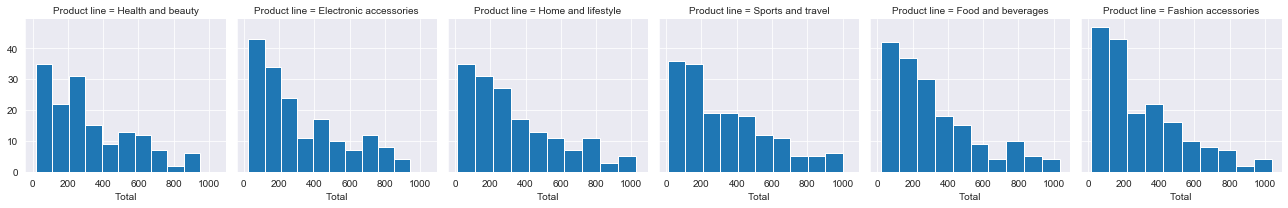

In [179]:
g=sb.FacetGrid(data=df,col='Product line')
g.map(plt.hist,'Total');

Observation: All are skewed to right. 

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?¶


The following are the interesting observations:
1. Branch C has highest cash sales compared to other branches. Also the female customers are more in branch C.
2. Naypitaw city has the highest cash transactions. Also it has highest Food & Beverages sales. It is lowest in purchases in 
sports and lifestyle.
3. Highest average ratings belong to food & beverages. Home and lifestyle has the lowest average ratings.
4. Rush hour is at 7:00 Pm and most of the purchases are in food and beverages

# Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?¶


1. Credit purchases are significantly lower in branch C and there are also more women purchases in branch C.
2. Branch C which has the significant food and beverage sales has more cash sales then credit sales.


# Multivariate Analysis

# Exploring Total sales of each branch Payment wise


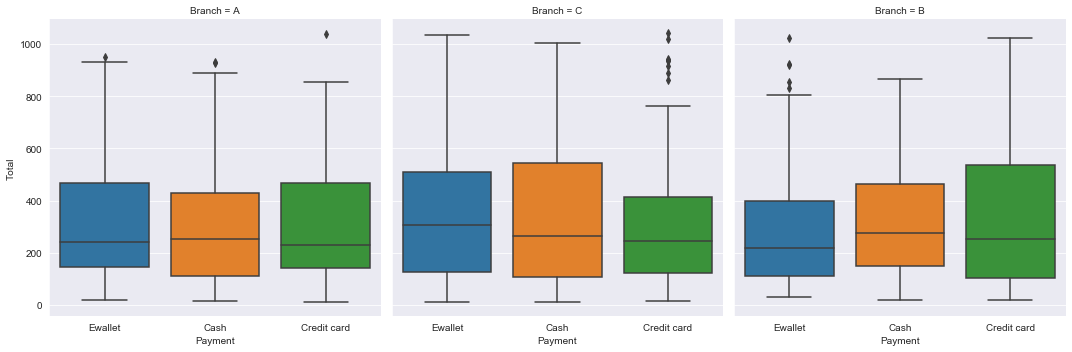

In [196]:
g=sb.catplot(x='Payment',y='Total',col='Branch',data=df,kind='box');

Observation: Branch C has Highest payment through cash mode, while Branch B has payment by Credit card mode.

# Exploring Total sales of each branch month wise


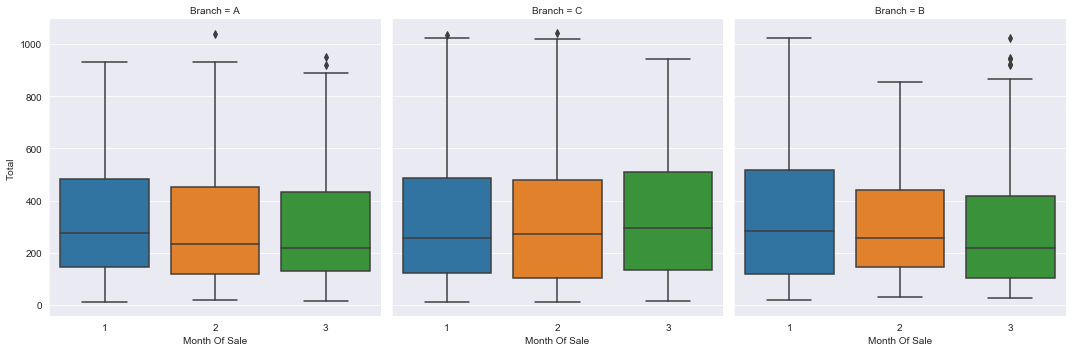

In [197]:
g=sb.catplot(x='Month Of Sale',y='Total',col='Branch',data=df,kind='box');

Observation: Branch B and Branch A has higher sales in January. While for Branch C, March has the higher sales.

In [198]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month Of Sale
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3


# Exploring Total sales of each branch Product line wise.


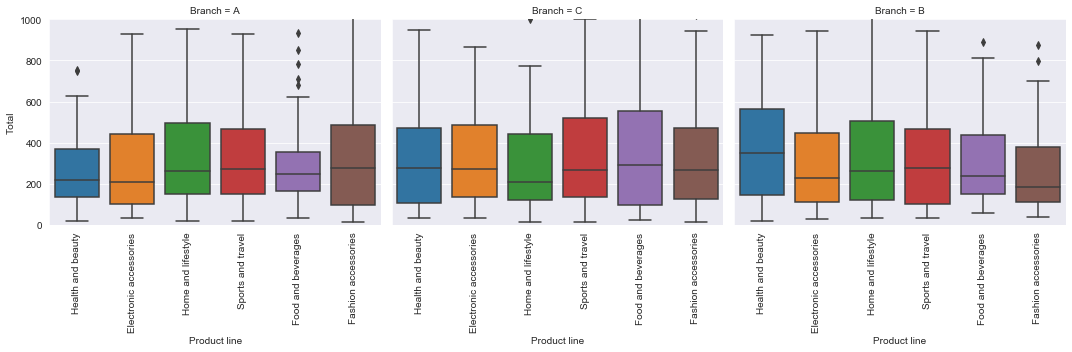

In [225]:
g=sb.catplot(x='Product line',y='Total',col='Branch',data=df,kind='box')
for axes in g.axes.flatten():
    axes.tick_params(axis='x',rotation=90)
    axes.set_ylim((0,1000))
plt.tight_layout()

Observations: 
Health and beauty has the greatest median for Branch B.

In [201]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month Of Sale
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3


In [203]:
figure(figsize=(10, 8))
sls=df.groupby('Date').sum()['Total']
df_sls=pd.DataFrame(sls)
df_sls.head()

,Total
Date,
2019-01-01,4745.1810
2019-01-02,1945.5030
2019-01-03,2078.1285
2019-01-04,1623.6885
2019-01-05,3536.6835


<Figure size 720x576 with 0 Axes>

In [216]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month Of Sale
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3


In [326]:
df_sls.reset_index(inplace=True)

In [327]:
df_sls.head()

,Date,Total
0,2019-01-01,4745.1810
1,2019-01-02,1945.5030
2,2019-01-03,2078.1285
3,2019-01-04,1623.6885
4,2019-01-05,3536.6835


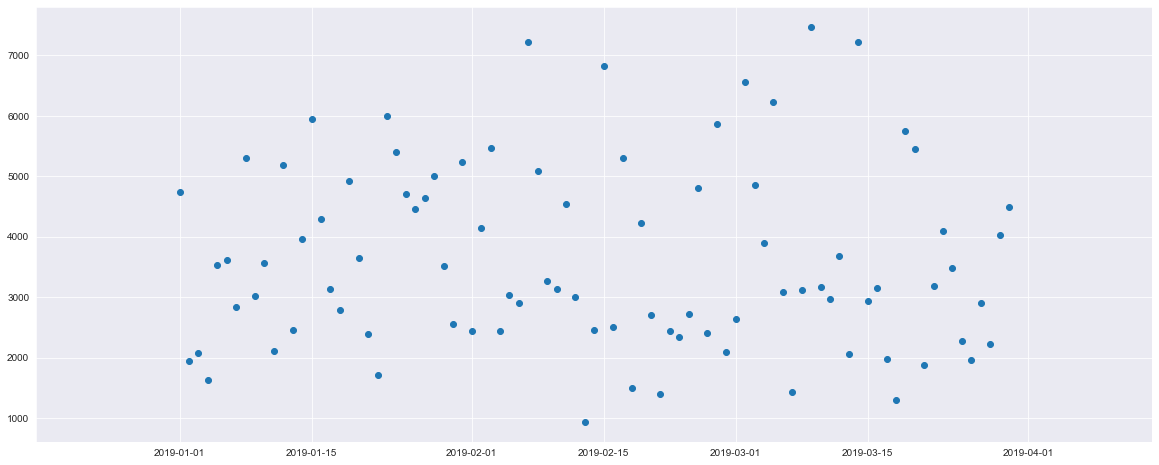

In [333]:
figure(figsize=(20, 8))

plt.scatter(data=df_sls,x='Date',y='Total')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We explored branch wise trends for different predictive variable and came to the following conclusions:
1. Monthly median total sales seems different in all the 3 branches
2. No singular trend in purchases of different product line seen in all the three branches.
Consumer choices in all the three branches seems difference requiring further analysis about the demographics, income levels,
rural or urban divide.


### Were there any interesting or surprising interactions between features?


No particular surprises found.